# Random Graphs

In [11]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np 
from utils import show_graph
%matplotlib inline

## Erdös-Rényi Random Graph
- also called a binomial graph or G(n,p)
- n nodes, an edge e=(n1, n2) exists with probablity p

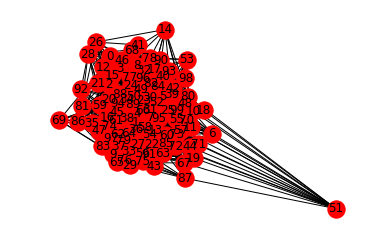

In [12]:
G = nx.erdos_renyi_graph(n=100, p=0.2, directed=False)
nx.draw_networkx(G)
show_graph()

## Probability of a node having degree $k$
The expected degree of a node equals $$ P(k_i=k) = {N \choose k} p^k (1− p)^{N−1−k}$$

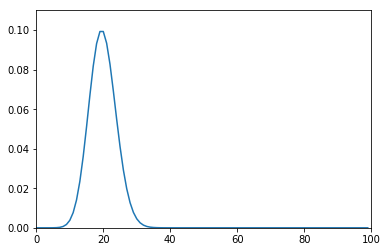

In [13]:
def choose(n, k):
    from math import factorial
    return (factorial(n) / 
            (factorial(n-k) * factorial(k)))

def p_of_degree(k, n, p):
    '''Returns the probability of a node
    in a random n, p binomial graph having k degrees'''
    return choose(n-1, k) * p**k * (1-p)**(n-1-k)

# G.number_of_nodes() == G.order()
plt.plot([p_of_degree(k, G.number_of_nodes(), 0.2) for k in xrange(G.number_of_nodes())])
plt.ylim(0,0.11)
plt.xlim(0,100);

## Average degrees $\langle k \rangle$ of a node 

- Equal to the number of possible successor nodes $N - 1$ times the probability $p$ of an edge connecting them.
- So, for large $N$, roughly $Np$

In [14]:
def expected_degree(n, p):
    return (n-1) * p

expected_degree(100, 0.2)

19.8

In [15]:
def average_path(n, p):
    # node at distance L
    # n = k**L
    # log n = L log k
    # L = log n / log k
    return np.log(n) / np.log(expected_degree(n, p))

average_path(100, 0.2)

1.54241820866388

## Relationship	of	$\langle k \rangle$	and	graph connectedness	
- $\langle k \rangle =$ average degree(np) 
- If $\langle k \rangle < 1$ graph is disconnected
- If $\langle k \rangle > 1$ graph has a giant component
- If $\langle k \rangle \geqslant ln(N)$ graph	is	totally	connected	

# Clustering coefficient 
The	_proportion_ of	A’s	neighbours ($N(A)$) connected by an edge.
[<a href=https://en.wikipedia.org/wiki/Clustering_coefficient>Wiki</a>]

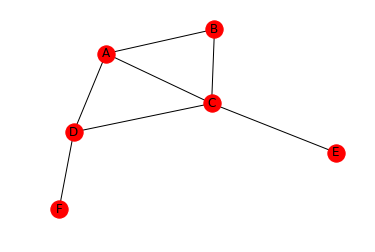

In [16]:
G = nx.Graph()
G.add_edges_from([('A','B'),
                  ('A','C'),
                  ('A','D'),
                  ('B','C'),
                  ('C','D'),
                  ('C','E'),
                  ('D','F')
                 ])
nx.draw_networkx(G, pos=nx.spring_layout(G))
show_graph()

### Local clustering coefficient $C_i$
- Gives an indication of the embeddedness of single nodes
- Quantifies how close the neighbours of a node $v_i$ are to being a clique (complete graph)

An edge $e_{ij}$ connects node $v_{i}$ with node $v_{j}$. The neighbours $N_i$ of a node $v_i$ is the set of its immediately connected neighbours
$$N_i = \{ v_j : e_{ij} \in E \lor e_{ji} \in E \}$$
Recall that the degree $k_i$ of a node is the size of the neighbourhood $N_i$

#### The local clustering coefficient $C_i$  is the proportion of links between the vertices within its neighbourhood divided by the number of links that could possibly exist between them

$$ C_i = \frac{ 2|e_{jk}| }{ k_i(k_i-1)} : v_j, v_k \in N_i, e_{jk} \in E $$

In [65]:
def local_clustering_coef(v, G):
    from itertools import combinations
    k = G.degree(v)
    possible_links = k * (k - 1)
    if possible_links == 0:
        return 0.0
    else:
        actual_links = len([e for e in combinations(G.neighbors(v), 2) if e in G.edges()])
    return (2 * actual_links) / float(possible_links)

def clustering(G):
    return {v: local_clustering_coef(v, G) for v in G.nodes()}

clustering(G)

{'A': 0.6666666666666666,
 'B': 1.0,
 'C': 0.3333333333333333,
 'D': 0.3333333333333333,
 'E': 0.0,
 'F': 0.0}

### Global clustering coefficient $CG$
- Gives an overall indication of the clustering in the network